In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
colors = pd.read_csv('source_colors.csv')
colors.head()

,DNF_ZMEAN_MOF,MAG_PSF_G,MAG_PSF_R,MAG_PSF_I,MAG_PSF_Z
0,0.559682,23.424372,22.960579,22.675220,22.707121
1,0.613049,24.238199,22.753164,22.355976,22.186701
2,0.256492,24.271034,22.572611,21.496719,20.945122
3,0.058471,20.467564,20.403315,20.408634,20.230314
4,1.615111,24.693052,24.137976,24.449373,99.000000


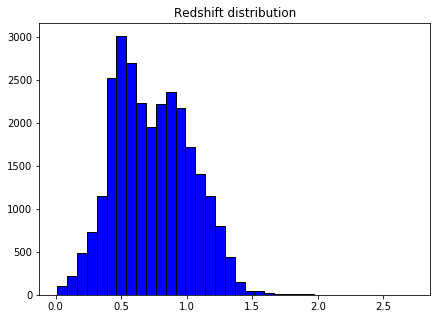

In [19]:
colors = colors[colors['DNF_ZMEAN_MOF'] > 0.01]
colors = colors[colors['MAG_PSF_G'] < 30.]
colors = colors[colors['MAG_PSF_R'] < 30.]
colors = colors[colors['MAG_PSF_I'] < 30.]
# Redshift distribution
plt.figure(figsize=(7,5))
plt.title('Redshift distribution')
plt.hist(colors['DNF_ZMEAN_MOF'], color = 'blue', edgecolor = 'black', bins = int(180/5))
plt.show()

In [20]:
colors['g_r'] = colors['MAG_PSF_G'] - colors['MAG_PSF_R']
colors['g_i'] = colors['MAG_PSF_G'] - colors['MAG_PSF_I']
colors.head()

,DNF_ZMEAN_MOF,MAG_PSF_G,MAG_PSF_R,MAG_PSF_I,MAG_PSF_Z,g_r,g_i
0,0.559682,23.424372,22.960579,22.675220,22.707121,0.463793,0.749151
1,0.613049,24.238199,22.753164,22.355976,22.186701,1.485035,1.882223
2,0.256492,24.271034,22.572611,21.496719,20.945122,1.698423,2.774315
3,0.058471,20.467564,20.403315,20.408634,20.230314,0.064249,0.058929
4,1.615111,24.693052,24.137976,24.449373,99.000000,0.555077,0.243679


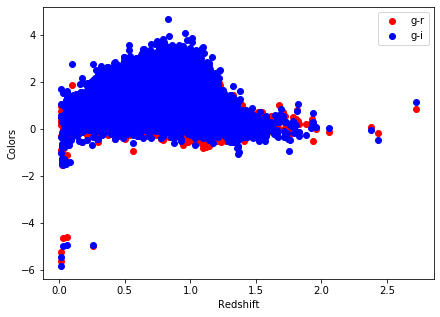

In [21]:
plt.figure(figsize=(7,5))
plt.plot(colors['DNF_ZMEAN_MOF'], colors['g_r'], 'ro', label='g-r')
plt.plot(colors['DNF_ZMEAN_MOF'], colors['g_i'], 'bo', label='g-i')
plt.xlabel('Redshift')
plt.ylabel('Colors')
plt.legend()
plt.show()

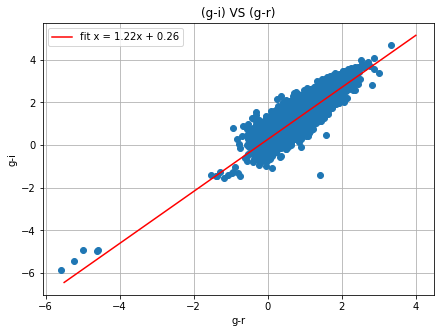

In [32]:
# Linear-regression g-r vs g-i
coefficients = np.polyfit(colors['g_r'], colors['g_i'], 1)
x_fit = np.linspace(-5.5, 4, 100)
y_fit = coefficients[0]*x_fit + coefficients[1]

plt.figure(figsize=(7,5))
plt.plot(colors['g_r'], colors['g_i'], 'o')
plt.plot(x_fit, y_fit, 'r', label = 'fit x = {:.2f}x + {:.2f}'.format(coefficients[0],coefficients[1]))
plt.title('(g-i) VS (g-r)')
plt.xlabel('g-r')
plt.ylabel('g-i')
plt.legend()
plt.grid()
plt.show()

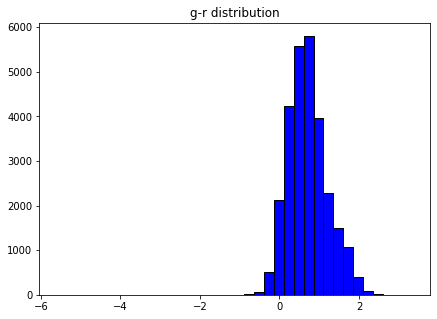

In [7]:
plt.figure(figsize=(7,5))
plt.hist(colors['g_r'], color = 'blue', edgecolor = 'black', bins = int(180/5))
plt.title('g-r distribution')
plt.show()

I want to see the distribution of g-r color in the interval of redshift: 0.0-0.3 and >1.5

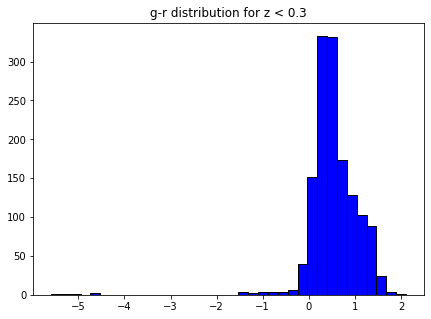

In [8]:
colors_1 = colors[colors['DNF_ZMEAN_MOF'] < 0.3]
plt.figure(figsize=(7,5))
plt.title('g-r distribution for z < 0.3')
plt.hist(colors_1['g_r'], color = 'blue', edgecolor = 'black', bins = int(180/5))
plt.show()

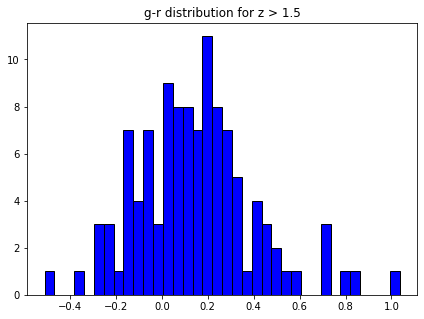

In [9]:
colors_1 = colors[colors['DNF_ZMEAN_MOF'] > 1.5]
plt.figure(figsize=(7,5))
plt.title('g-r distribution for z > 1.5')
plt.hist(colors_1['g_r'], color = 'blue', edgecolor = 'black', bins = int(180/5))
plt.show()